In [1]:
import numpy as np

# AND gate dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Perceptron parameters
learning_rate = 0.1
epochs = 1000

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0

# Activation function: Step function
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        # Linear combination
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Error
        error = y[i] - y_pred

        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    # Print weights and bias every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Weights = {weights}, Bias = {bias}")

# Final weights and bias
print("\nFinal learned weights:", weights)
print("Final learned bias:", bias)

# Evaluate on the dataset
predictions = []
for x in X:
    output = step_function(np.dot(x, weights) + bias)
    predictions.append(output)

accuracy = np.mean(predictions == y)
print("Accuracy on AND gate dataset:", accuracy)


Epoch 100: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 200: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 300: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 400: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 500: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 600: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 700: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 800: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 900: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 1000: Weights = [0.2 0.1], Bias = -0.20000000000000004

Final learned weights: [0.2 0.1]
Final learned bias: -0.20000000000000004
Accuracy on AND gate dataset: 1.0


In [ ]:
#Task2


Sigmoid Results:
Weights: [3.21158067 3.23969977]
Bias: -1.2978417022947257
Final Loss: 0.01964418690647156

ReLU Results:
Weights: [-0.69713329 -1.10582193]
Bias: 0.0
Final Loss: 0.75

Tanh Results:
Weights: [1.95281169 1.957465  ]
Bias: 0.005992533292158424
Final Loss: 0.0007650314233313691


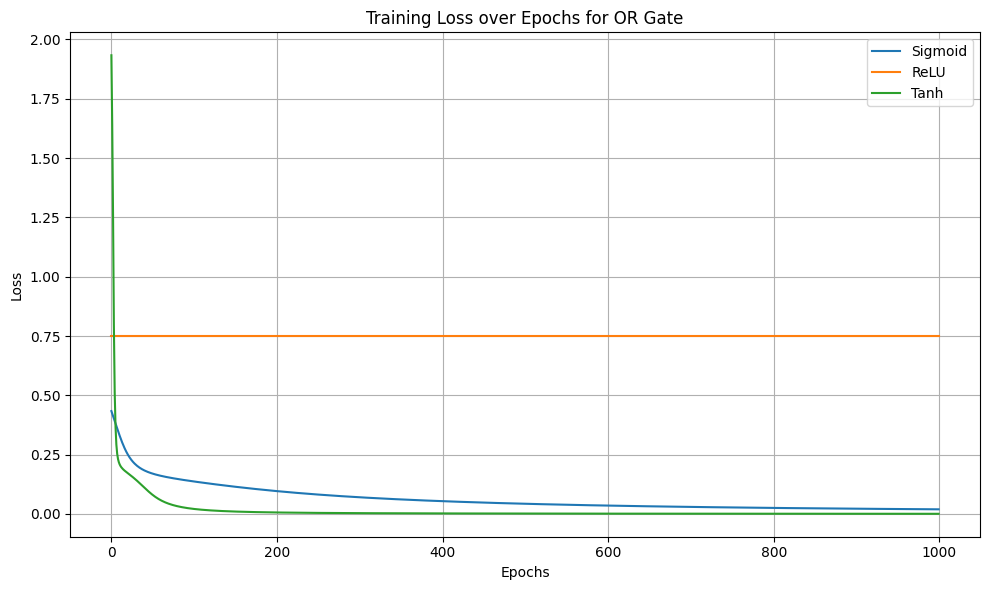

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# OR gate dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 1])

# Parameters
learning_rate = 0.1
epochs = 1000

# Activation functions and derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2

# Perceptron training function
def train_perceptron(X, y, activation, activation_deriv):
    weights = np.random.randn(X.shape[1])
    bias = 0
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            y_pred = activation(z)
            error = y[i] - y_pred

            # Loss = squared error
            total_loss += error ** 2

            # Gradient descent update
            dz = error * activation_deriv(z)
            weights += learning_rate * dz * X[i]
            bias += learning_rate * dz

        losses.append(total_loss / len(X))

    return weights, bias, losses

# Train with different activation functions
activations = {
    'Sigmoid': (sigmoid, sigmoid_deriv),
    'ReLU': (relu, relu_deriv),
    'Tanh': (tanh, tanh_deriv)
}

results = {}
for name, (act, act_deriv) in activations.items():
    weights, bias, loss = train_perceptron(X, y, act, act_deriv)
    results[name] = {'weights': weights, 'bias': bias, 'loss': loss}
    print(f"\n{name} Results:")
    print(f"Weights: {weights}")
    print(f"Bias: {bias}")
    print(f"Final Loss: {loss[-1]}")

# Plot training losses
plt.figure(figsize=(10, 6))
for name in results:
    plt.plot(results[name]['loss'], label=f'{name}')
plt.title("Training Loss over Epochs for OR Gate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Task3

Epoch 1000, Loss: 0.249407
Epoch 2000, Loss: 0.245455
Epoch 3000, Loss: 0.204780
Epoch 4000, Loss: 0.153230
Epoch 5000, Loss: 0.138699
Epoch 6000, Loss: 0.133597
Epoch 7000, Loss: 0.131153
Epoch 8000, Loss: 0.129750
Epoch 9000, Loss: 0.128850
Epoch 10000, Loss: 0.128227

Final Predictions:
Input: [0 0] -> Prediction: 0.053 -> Label: 0
Input: [0 1] -> Prediction: 0.496 -> Label: 0
Input: [1 0] -> Prediction: 0.951 -> Label: 1
Input: [1 1] -> Prediction: 0.503 -> Label: 1


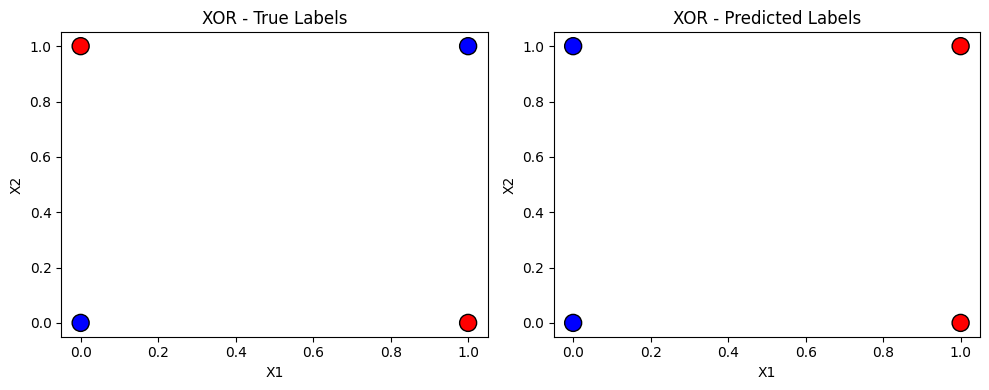

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# MLP parameters
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Store training loss
losses = []

# Training loop
for epoch in range(1, epochs + 1):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss (mean squared error)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

    # Backpropagation
    dz2 = (a2 - y) * sigmoid_derivative(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# Final predictions
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
predictions = sigmoid(z2)
predicted_labels = (predictions > 0.5).astype(int)

# Print predictions
print("\nFinal Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Prediction: {predictions[i][0]:.3f} -> Label: {predicted_labels[i][0]}")

# Plot true vs predicted
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# True labels
axes[0].scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', s=150, edgecolors='k')
axes[0].set_title('XOR - True Labels')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

# Predicted labels
axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels.flatten(), cmap='bwr', s=150, edgecolors='k')
axes[1].set_title('XOR - Predicted Labels')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

plt.tight_layout()
plt.show()


Training with learning rate = 0.001
Training with learning rate = 0.01
Training with learning rate = 0.1
Training with learning rate = 1.0


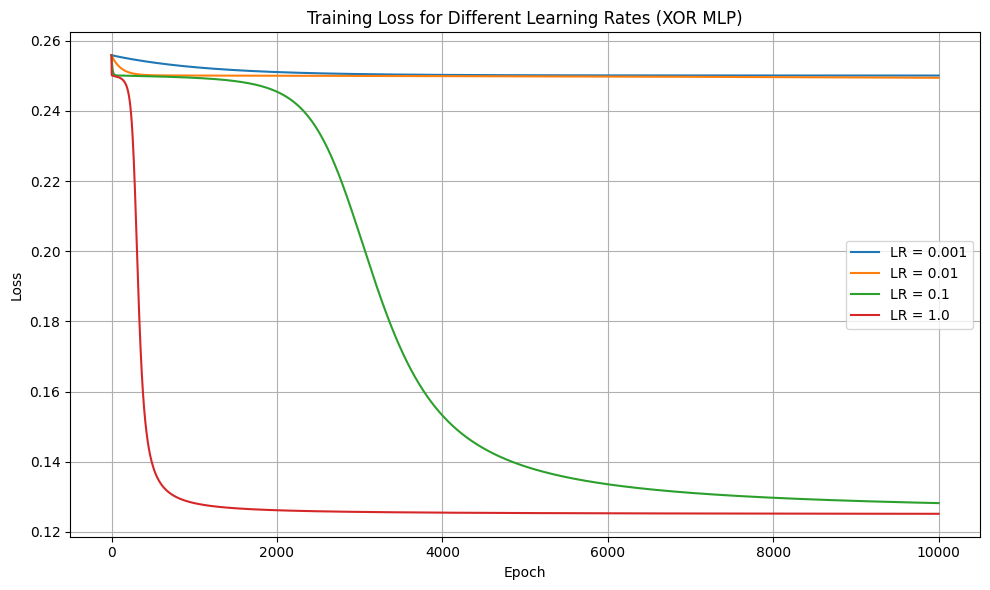

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# MLP training function
def train_mlp(X, y, learning_rate, epochs=10000, hidden_size=2):
    np.random.seed(42)
    input_size = X.shape[1]
    output_size = y.shape[1]

    # Initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    losses = []

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Compute loss (Mean Squared Error)
        loss = np.mean((y - a2) ** 2)
        losses.append(loss)

        # Backward pass
        dz2 = (a2 - y) * sigmoid_derivative(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    return losses

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0]
losses_by_lr = {}

# Train and collect losses
for lr in learning_rates:
    print(f"Training with learning rate = {lr}")
    losses = train_mlp(X, y, learning_rate=lr)
    losses_by_lr[lr] = losses

# Plot loss curves
plt.figure(figsize=(10, 6))
for lr, loss_curve in losses_by_lr.items():
    plt.plot(loss_curve, label=f"LR = {lr}")
plt.title("Training Loss for Different Learning Rates (XOR MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Test Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


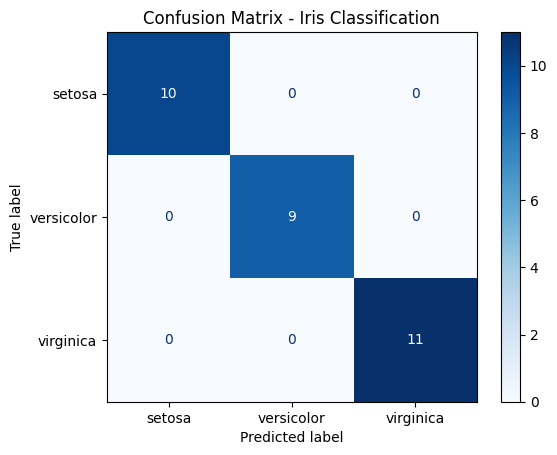

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# MLP training function
def train_mlp(X, y, X_val, y_val, hidden_size=10, epochs=10000, learning_rate=0.1):
    input_size = X.shape[1]
    output_size = y.shape[1]
    np.random.seed(42)

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    for epoch in range(epochs):
        # Forward
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Backward
        dz2 = (a2 - y) * sigmoid_derivative(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Predict
    z1_val = np.dot(X_val, W1) + b1
    a1_val = sigmoid(z1_val)
    z2_val = np.dot(a1_val, W2) + b2
    predictions = sigmoid(z2_val)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_val, axis=1)

    acc = accuracy_score(true_classes, pred_classes)
    cm = confusion_matrix(true_classes, pred_classes)
    return acc, cm

# Train and evaluate
accuracy, conf_matrix = train_mlp(X_train, y_train, X_test, y_test)

# Output results
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Optional: visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Iris Classification")
plt.show()
